In [ ]:
# ====================================================================
# I. Data Manipulation, Core, & Utilities
# ====================================================================
import numpy as np 
import pandas as pd 
from scipy.stats import randint
import joblib
import pickle
import dill

# ====================================================================
# II. Data Visualization
# ====================================================================
import seaborn as sns 
import matplotlib.pyplot as plt

# ====================================================================
# III. Preprocessing & Feature Engineering
# ====================================================================
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import OneHotEncoder, RobustScaler # encoding & scaling
from category_encoders import BinaryEncoder # encoding

# ====================================================================
# IV. Model Composition & Pipeline
# ====================================================================
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # pipeline with imblearn

# ====================================================================
# V. Model Algorithms (Estimators)
# ====================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Similar Type (Bagging & Boosting)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

# ====================================================================
# VI. Model Evaluation, Tuning, & Imbalanced Data
# ====================================================================
from sklearn.model_selection import cross_val_score, RandomizedSearchCV # cross validation & tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # metric
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score, classification_report
from imblearn.over_sampling import SMOTE


# ====================================================================
# VII. Model Interpretability
# ====================================================================
import shap

/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
base_dir = "/Users/dyahalmira/Desktop/Dataset/"

In [5]:
df = pd.read_csv(base_dir + 'data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [7]:
df.duplicated().sum()

np.int64(73371)

In [8]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [9]:
df = df.dropna(ignore_index=True)

In [10]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83217,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83218,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83219,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83220,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [11]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

In [12]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,162,"[ZWE, CMR]"
1,market_segment,object,0,0.0,8,"[Groups, Offline TA/TO]"
2,previous_cancellations,int64,0,0.0,15,"[26, 11]"
3,booking_changes,int64,0,0.0,19,"[0, 20]"
4,deposit_type,object,0,0.0,3,"[Refundable, No Deposit]"
5,days_in_waiting_list,int64,0,0.0,115,"[18, 75]"
6,customer_type,object,0,0.0,4,"[Transient-Party, Contract]"
7,reserved_room_type,object,0,0.0,10,"[C, E]"
8,required_car_parking_spaces,int64,0,0.0,5,"[3, 0]"
9,total_of_special_requests,int64,0,0.0,6,"[2, 1]"


In [13]:
df=df.dropna()

In [14]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83217,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83218,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83219,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83220,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [15]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,162,"[BFA, AUS]"
1,market_segment,object,0,0.0,8,"[Groups, Complementary]"
2,previous_cancellations,int64,0,0.0,15,"[25, 19]"
3,booking_changes,int64,0,0.0,19,"[14, 5]"
4,deposit_type,object,0,0.0,3,"[No Deposit, Refundable]"
5,days_in_waiting_list,int64,0,0.0,115,"[71, 64]"
6,customer_type,object,0,0.0,4,"[Contract, Group]"
7,reserved_room_type,object,0,0.0,10,"[L, F]"
8,required_car_parking_spaces,int64,0,0.0,5,"[8, 1]"
9,total_of_special_requests,int64,0,0.0,6,"[3, 2]"


In [16]:
df = df.dropna(ignore_index=True)

In [17]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83217,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83218,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83219,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83220,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0




# Capstone Project: Prediksi Pembatalan Reservasi (Minimasi Risiko Overbooking)

## 1\. Konteks Bisnis dan Permasalahan

### Tujuan Bisnis: Mengelola Kapasitas dan Risiko *Overbook*

Proyek ini bertujuan untuk memprediksi apakah suatu reservasi akan **dibatalkan** atau tidak (`is_canceled`). Hasil prediksi ini sangat krusial bagi **Revenue Management** dan **Operasional** sebuah bisnis (misalnya, hotel atau maskapai).

  * **Target Variabel:** `is_canceled` (Variabel Biner)
      * **0:** Reservasi **TIDAK** Dibatalkan (Check-in sukses)
      * **1:** Reservasi **Dibatalkan**

### Stakeholders dan Kerugian Bisnis

| Stakeholder | Keterlibatan | Kerugian Utama Jika Prediksi Salah |
| :--- | :--- | :--- |
| **Revenue Manager** | Mengambil keputusan *overbooking* (mengizinkan lebih banyak reservasi dari kapasitas fisik). | **Rugi (Kerugian Kesempatan):** Jika memprediksi terlalu banyak pembatalan (sehingga tidak berani *overbook*), padahal pembatalan sedikit. |
| **Tim Operasional** | Menyiapkan kamar/tempat untuk tamu yang datang. | **Rugi (Biaya Kompensasi & Reputasi):** Jika prediksi pembatalan *miss* (tamu yang dibatalkan datang), menyebabkan **Actual Overbooking**. |
| **Pelanggan** | Pihak yang melakukan reservasi. | **Rugi (Kepercayaan & Pengalaman):** Jika ditolak saat *check-in* karena *overbooking* yang parah. |

### Fokus Metrik: Mengapa Harus **Recall**?

Dalam konteks *overbooking*, **kesalahan yang paling mahal** adalah **False Negative (FN)**.

| Hasil Prediksi | Definisi | Dampak Bisnis (FN) |
| :--- | :--- | :--- |
| **False Negative (FN)** | **Model memprediksi TIDAK dibatalkan (0), padahal aslinya DIBATALKAN (1).** (Prediksi *miss* pembatalan) | Jika model digunakan untuk menghitung kapasitas *overbook*, tingginya FN berarti kita **meremehkan** jumlah pembatalan yang sebenarnya terjadi. Ini menyebabkan **overbooking yang parah**, di mana tamu yang datang harus ditolak. Kerugiannya besar (kompensasi, reputasi buruk, krisis operasional). |
| **False Positive (FP)** | **Model memprediksi DIBATALKAN (1), padahal aslinya TIDAK dibatalkan (0).** (Prediksi batal yang salah) | Model memprediksi bahwa kamar itu kosong, padahal ada tamu yang datang. Jika prediksi ini digunakan untuk menolak *overbook*, kita mungkin kehilangan kesempatan menjual kamar (Lost Revenue). |

**Kesimpulan Bisnis:** Untuk memitigasi risiko *overbooking* yang parah (yang merusak reputasi dan memakan biaya kompensasi), kita harus berusaha **sekecil mungkin melakukan kesalahan FN**. Oleh karena itu, kita harus **memaksimalkan metrik RECALL**.

$$
\text{Recall} = \frac{\text{True Positive (TP)}}{\text{True Positive (TP)} + \text{False Negative (FN)}}
$$Semakin tinggi *Recall*, semakin sedikit **FN** yang kita *miss*, dan semakin aman keputusan *overbooking* kita.


In [18]:
df.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              52340
              1              20672
Non Refund    1              10037
              0                 63
Refundable    0                 87
              1                 23
Name: count, dtype: int64

/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1681690276.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1681690276.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1681690276.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1681690276.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1681690276.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

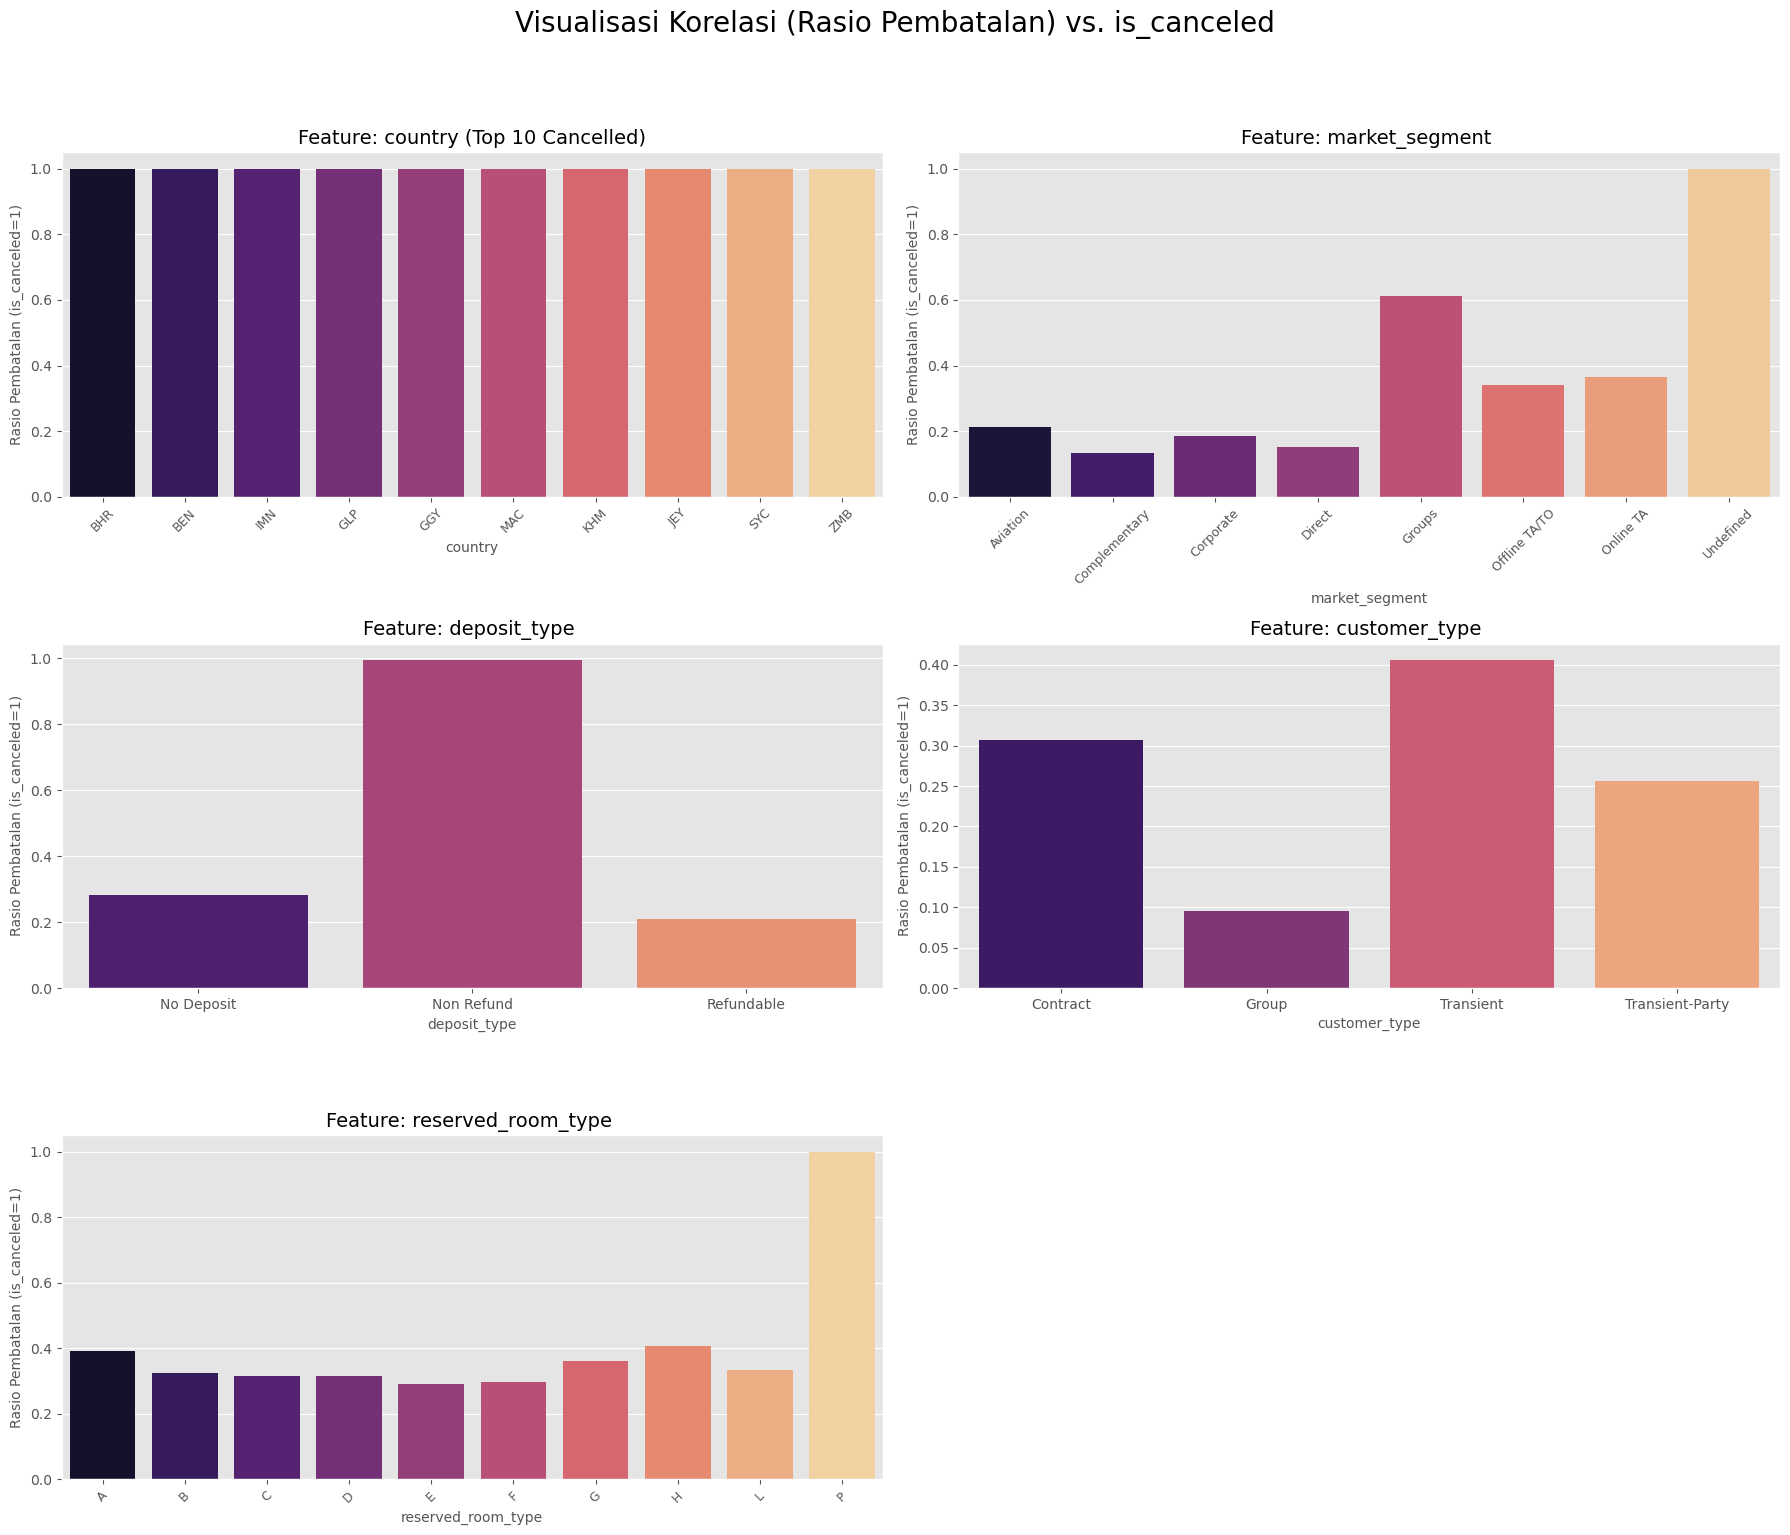

In [19]:

categorical_cols = [
    'country', 
    'market_segment', 
    'deposit_type', 
    'customer_type', 
    'reserved_room_type'
]

# Tentukan jumlah plot per baris untuk tampilan yang rapi
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols # Menghitung jumlah baris yang dibutuhkan

plt.style.use('ggplot') # Menggunakan style plot yang bersih
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle('Visualisasi Korelasi (Rasio Pembatalan) vs. is_canceled', fontsize=20, y=1.02)
axes = axes.flatten() # Meratakan array axes agar mudah diakses dengan looping

# Loop melalui setiap kolom kategorikal
for i, col in enumerate(categorical_cols):
    
    # 1. Hitung Rasio Pembatalan per Kategori
    # Menghitung proporsi (normalize=True) dan mengubah format agar siap diplot
    prop_df = df.groupby(col)['is_canceled'].value_counts(normalize=True).unstack()

    # 2. Plotting menggunakan Seaborn
    # Kita fokus pada proporsi is_canceled = 1 (Batal) untuk perbandingan
    # Menggunakan plot bar untuk setiap kategori
    ax = axes[i]
    
    # Jika kolom 'country' memiliki terlalu banyak nilai unik (>10), kita hanya ambil 10 teratas
    if col == 'country' and prop_df.shape[0] > 10:
        # Sort by Canceled Ratio (index 1) dan ambil 10 teratas
        top_10_countries = prop_df[1].sort_values(ascending=False).head(10).index
        plot_data = prop_df.loc[top_10_countries]
        title_suffix = '(Top 10 Cancelled)'
    else:
        plot_data = prop_df
        title_suffix = ''

    # Plot proporsi Pembatalan (is_canceled=1)
    sns.barplot(
        x=plot_data.index,          # Kategori
        y=plot_data[1],             # Proporsi Batal
        ax=ax,
        palette='magma'             # Warna yang menarik
    )
    
    # 3. Keterangan Plot
    ax.set_title(f'Feature: {col} {title_suffix}', fontsize=14)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Rasio Pembatalan (is_canceled=1)', fontsize=10)
    
    # Rotasi label X agar tidak tumpang tindih
    if len(plot_data.index) > 5:
        ax.tick_params(axis='x', rotation=45, labelsize=9)
    else:
        ax.tick_params(axis='x', rotation=0)

# Sembunyikan subplot yang kosong (jika ada)
if len(categorical_cols) < n_rows * n_cols:
    for j in range(len(categorical_cols), n_rows * n_cols):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Mengatur layout agar suptitle tidak terpotong
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83222 entries, 0 to 83221
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83222 non-null  object
 2   previous_cancellations       83222 non-null  int64 
 3   booking_changes              83222 non-null  int64 
 4   deposit_type                 83222 non-null  object
 5   days_in_waiting_list         83222 non-null  int64 
 6   customer_type                83222 non-null  object
 7   reserved_room_type           83222 non-null  object
 8   required_car_parking_spaces  83222 non-null  int64 
 9   total_of_special_requests    83222 non-null  int64 
 10  is_canceled                  83222 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [21]:
cat_feature_cols = df.select_dtypes('object').columns
cat_feature_cols

Index(['country', 'market_segment', 'deposit_type', 'customer_type',
       'reserved_room_type'],
      dtype='object')

In [22]:
cat_cols_count = df[cat_feature_cols].nunique()
cat_cols_count

country               162
market_segment          8
deposit_type            3
customer_type           4
reserved_room_type     10
dtype: int64

In [23]:
df["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.630723
1    0.369277
Name: proportion, dtype: float64

/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/3858321879.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_canceled'], y=df[col], ax=ax,
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/3858321879.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_canceled'], y=df[col], ax=ax,
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/3858321879.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_canceled'], y=df[col], ax=ax,
/var/folders/dc/s4_2lkhj1w71d400jbv_shvm000

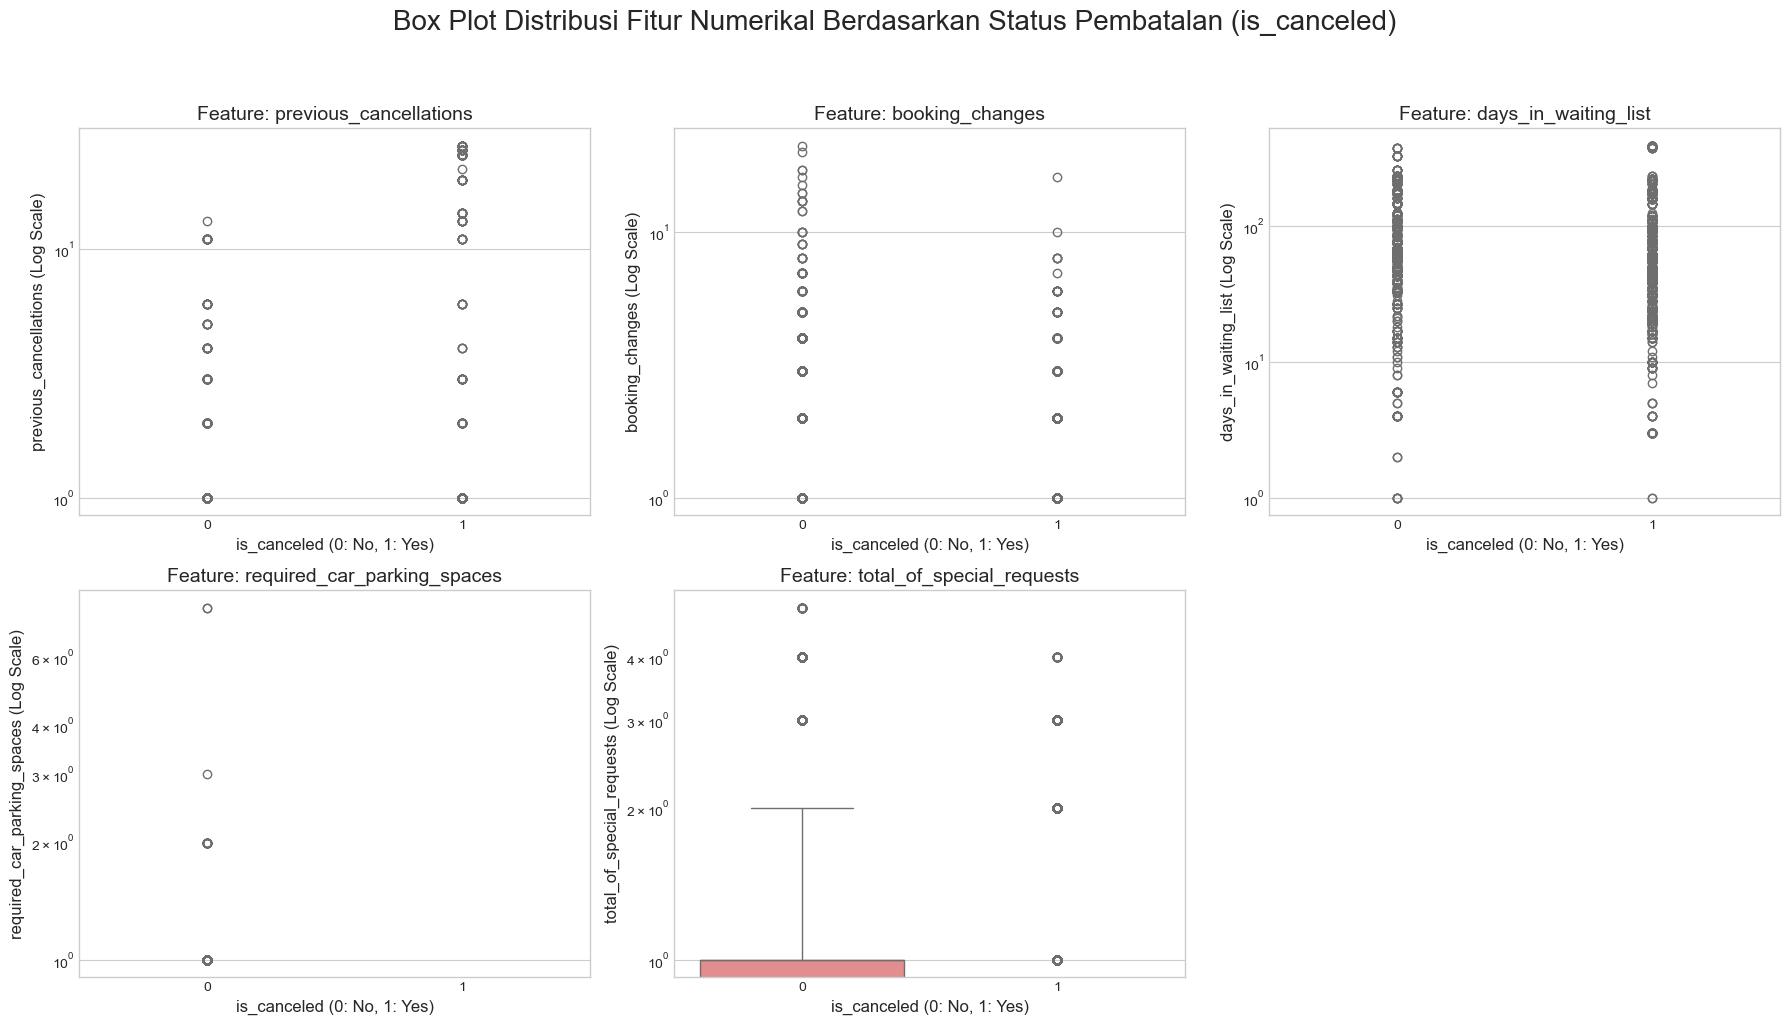

In [26]:

numeric_feature_cols = df.drop(columns = 'is_canceled', errors='ignore').select_dtypes('number').columns

n_cols = 3 
n_rows = (len(numeric_feature_cols) + n_cols - 1) // n_cols

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle('Box Plot Distribusi Fitur Numerikal Berdasarkan Status Pembatalan (is_canceled)', 
             fontsize=20, y=1.02)
axes = axes.flatten()

# Looping untuk membuat Box Plot Komparatif
for i, col in enumerate(numeric_feature_cols):
    ax = axes[i]
    

    sns.boxplot(x=df['is_canceled'], y=df[col], ax=ax, 
            palette={'0': 'lightcoral', '1': 'lightblue'}) # Tambahkan palet warna
    
    if df[col].max() > 0:
        ax.set_yscale('log')
        ax.set_ylabel(f'{col} (Log Scale)', fontsize=12)
    else:
        ax.set_ylabel(f'{col}', fontsize=12)

    ax.set_title(f'Feature: {col}', fontsize=14)
    ax.set_xlabel('is_canceled (0: No, 1: Yes)', fontsize=12)
    
if len(numeric_feature_cols) < n_rows * n_cols:
    for j in range(len(numeric_feature_cols), n_rows * n_cols):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [27]:

X = df.drop(columns=['is_canceled']) 
y = df['is_canceled']

display(X.head(),y.head())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2


0    0
1    0
2    0
3    1
4    0
Name: is_canceled, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.2,          
                                                    random_state=0,        
                                                    stratify=y
)              

In [29]:
binary_cols = ['country', 'reserved_room_type'] 
oneHot = ['market_segment', 'deposit_type', 'customer_type']

In [ ]:
onehot = OneHotEncoder(handle_unknown="ignore", #kalau ada kategori langka diabaikan (0 semua)
                       drop="first", 
                       sparse_output=False)
binary = BinaryEncoder()

preprocess_transformer = ColumnTransformer([
    ("onehot", onehot, oneHot),
    ("binary", binary, binary_cols),
    ("robust", RobustScaler(), numeric_feature_cols)
],remainder="passthrough").set_output(transform="pandas")


preprocess_transformer

,transformers,"[('onehot', ...), ('binary', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [31]:
preprocess_transformer.fit_transform(X_train, y_train)

,onehot__market_segment_Complementary,onehot__market_segment_Corporate,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__market_segment_Undefined,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,...,binary__country_7,binary__reserved_room_type_0,binary__reserved_room_type_1,binary__reserved_room_type_2,binary__reserved_room_type_3,robust__previous_cancellations,robust__booking_changes,robust__days_in_waiting_list,robust__required_car_parking_spaces,robust__total_of_special_requests
55214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,1.0,0.0,0.0,1.0
56068,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0
21820,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0
28713,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
16268,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,1.0,0.0,0.0,1.0
57049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0
24981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0
64375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0


In [ ]:
# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

# bagging
bagging = BaggingClassifier(random_state=0)

# random forest
rf = RandomForestClassifier(random_state=0)

#gradient boosting
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_sxtate=0)

list_model = [logreg, knn, tree, bagging, 
              rf, adaboost, gboost, xgboost]

In [ ]:
# Cross Validation
cv_all = []
cv_mean = []
cv_std = []

for model in list_model:
    pipe_model = Pipeline([
        ("preprocessing", preprocess_transformer),
        ("modeling", model)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X= X_train,
        y = y_train,
        cv = 5,
        scoring = 'recall'
    )

    cv_all.append(model_cv.round(4))
    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules

In [ ]:
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["recall_all"] = cv_all
df_cv["recall_mean"] = cv_mean
df_cv["recall_std"] = cv_std

df_cv.sort_values(["recall_mean", "recall_std"], 
                  ascending=[False, True])

,model,recall_all,recall_mean,recall_std
4,RandomForestClassifier(random_state=0),"[0.6966, 0.6964, 0.7069, 0.6874, 0.6892]",0.695302,0.006885
2,DecisionTreeClassifier(random_state=0),"[0.6921, 0.6876, 0.7008, 0.6844, 0.6882]",0.690624,0.005665
3,BaggingClassifier(random_state=0),"[0.7, 0.6937, 0.6874, 0.6894, 0.6805]",0.690218,0.006501
7,"XGBClassifier(base_score=None, booster=None, c...","[0.6896, 0.6895, 0.6779, 0.6731, 0.6863]",0.683264,0.006651
1,KNeighborsClassifier(),"[0.5735, 0.6638, 0.6656, 0.6707, 0.664]",0.647549,0.037099
6,GradientBoostingClassifier(random_state=0),"[0.6006, 0.5847, 0.5882, 0.5975, 0.5961]",0.593411,0.005977
0,LogisticRegression(random_state=0),"[0.5758, 0.5603, 0.5548, 0.5341, 0.5713]",0.559243,0.014645
5,AdaBoostClassifier(random_state=0),"[0.5038, 0.5442, 0.5422, 0.5448, 0.5294]",0.532886,0.015614



## Hasil *Cross Validation* dan Pemilihan Model

Berdasarkan hasil *Cross Validation* (CV) yang dilakukan pada berbagai model (*seperti Logistic Regression, Decision Tree, dan Ensemble Methods*), model **Random Forest Classifier** menunjukkan performa tertinggi pada metrik **Recall**.

In [ ]:
preprocess_transformer_no_scale = ColumnTransformer([
    ("onehot", onehot, oneHot),
    ("binary", binary, binary_cols)
],remainder="passthrough").set_output(transform="pandas")


preprocess_transformer_no_scale

,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [ ]:
pipe_base = Pipeline([
    ("preprocessing", preprocess_transformer_no_scale),
    ("model", rf)
])

pipe_base.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_train_base = pipe_base.predict(X_train)
y_test_base = pipe_base.predict(X_test)

recall_train_base = recall_score(y_train, y_train_base)
recall_test_base = recall_score(y_test, y_test_base)

print(f"RECALL TRAIN (BASE MODEL): {recall_train_base}")
print(f"RECALL TEST (BASE MODEL): {recall_test_base}")

RECALL TRAIN (BASE MODEL): 0.7147854382753711
RECALL TEST (BASE MODEL): 0.6783796974133723


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan model (Random Forest)
rf_model = RandomForestClassifier(random_state=0)

# Definisikan step resampling (SMOTE)
smote_sampler = SMOTE(random_state=0)

# Ganti sklearn.Pipeline dengan imblearn.Pipeline untuk mengintegrasikan resampling
pipe_smote_rf = ImbPipeline([
    ('preprocessing', preprocess_transformer_no_scale), # Transformer yang sudah ada
    ('sampler', smote_sampler),               # <-- Langkah Resampling di sini
    ('modeling', rf_model)
])

# Definisikan parameter yang akan diuji (termasuk parameter SMOTE)
param_distributions = {
    # Nonaktifkan class_weight pada RF jika menggunakan SMOTE, atau gunakan salah satunya
    # Di sini kita fokus pada tuning SMOTE dan RF:
    'sampler__k_neighbors': randint(3, 10), # Tuning k parameter pada SMOTE
    'modeling__n_estimators': randint(100, 300),
    'modeling__max_depth': [10, 20, None],
}

# Jalankan RandomizedSearchCV
random_search_smote = RandomizedSearchCV(
    estimator=pipe_smote_rf,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='recall',      # Tetap fokus pada Recall
    cv=5,
    random_state=0,
    n_jobs=-1
)



In [ ]:
# Latih Random Search pada data training
random_search_smote.fit(X_train, y_train)

# --- Cara Mengambil Hasil Terbaik ---
# Setelah proses fitting selesai:
best_model_rf_smote = random_search_smote.best_estimator_
best_recall_score_smote = random_search_smote.best_score_
best_params_rf_smote = random_search_smote.best_params_

/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/miniconda3/envs/base_copy/l

In [ ]:
best_model_rf_smote

,steps,"[('preprocessing', ...), ('sampler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
best_recall_score_smote

np.float64(0.8121618873296725)

In [ ]:
best_params_rf_smote

{'modeling__max_depth': None,
 'modeling__n_estimators': 182,
 'sampler__k_neighbors': 6}

In [ ]:
y_train_smote = best_model_rf_smote.predict(X_train)
y_test_smote = best_model_rf_smote.predict(X_test)

recall_train_smote = recall_score(y_train, y_train_smote)
recall_test_smote = recall_score(y_test, y_test_smote)

print(f"RECALL TRAIN (SMOTE MODEL): {recall_train_smote}")
print(f"RECALL TEST (SMOTE MODEL): {recall_test_smote}")

RECALL TRAIN (SMOTE MODEL): 0.8374211917836079
RECALL TEST (SMOTE MODEL): 0.802179925166748


In [ ]:
# Model Penalized (Untuk Perbandingan Cepat)
rf_penalized = RandomForestClassifier(
    class_weight='balanced', 
    random_state=0
)

pipe_penalized = Pipeline([
    ('preprocessing', preprocess_transformer_no_scale), 
    ('modeling', rf_penalized)
])

pipe_penalized.fit(X_train, y_train) 
# recall_test_penalized = recall_score(y_test, pipe_penalized.predict(X_test))

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
param_distributions_penalized = {
    # Fokus pada max_depth dan n_estimators
    'modeling__n_estimators': randint(low=80, high=200),  # Maksimal 200 pohon saja
    'modeling__max_depth': [15, 30, None],               # Lebih sedikit pilihan depth
    
    # Hanya tune min_samples_split yang krusial
    'modeling__min_samples_split': randint(low=5, high=15)
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Tentukan scoring (Wajib Recall)
scorer = make_scorer(recall_score)

# Tentukan Cross-Validation (Wajib Stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Inisialisasi RandomizedSearchCV
random_search_penalized = RandomizedSearchCV(
    estimator=pipe_penalized, # <-- Gunakan pipeline penalized Anda
    param_distributions=param_distributions_penalized,
    n_iter=50,                # Sesuaikan iterasi ini dengan waktu Anda (30-50 cukup)
    scoring=scorer,
    cv=cv,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

# --- Proses Fitting ---
random_search_penalized.fit(X_train, y_train)

# Ambil model terbaik
best_model_penalized = random_search_penalized.best_estimator_
best_recall_penalized = random_search_penalized.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=10, modeling__n_estimators=144; total time=  16.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=10, modeling__n_estimators=144; total time=  17.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=10, modeling__n_estimators=144; total time=  17.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=10, modeling__n_estimators=144; total time=  18.2s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=101; total time=  14.6s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=101; total time=  14.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=101; total time=  14.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=10, modeling__n_estimators=144; total time=  16.6s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=101; total time=  12.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=101; total time=  12.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=167; total time=  18.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=167; total time=  18.3s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=167; total time=  18.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=167; total time=  19.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=167; total time=  23.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=168; total time=  24.0s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=168; total time=  24.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=168; total time=  25.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=168; total time=  19.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=168; total time=  19.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=182; total time=  19.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=182; total time=  19.0s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=182; total time=  21.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=182; total time=  22.3s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=182; total time=  29.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=161; total time=  32.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=161; total time=  36.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=161; total time=  39.6s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=161; total time=  27.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=161; total time=  25.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=157; total time=  18.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=157; total time=  16.7s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=157; total time=  16.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=157; total time=  15.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=100; total time=   8.7s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=157; total time=  14.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=100; total time=   8.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=100; total time=   8.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=100; total time=   9.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=100; total time=   9.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=149; total time=  12.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=149; total time=  12.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=149; total time=  13.6s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=149; total time=  12.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=149; total time=  12.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=162; total time=  17.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=162; total time=  17.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=162; total time=  18.0s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=162; total time=  17.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=162; total time=  16.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=195; total time=  16.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=195; total time=  15.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=195; total time=  17.9s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=99; total time=  11.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=195; total time=  17.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=195; total time=  17.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=99; total time=  11.0s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=99; total time=  10.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=99; total time=  10.0s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=99; total time=   9.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=112; total time=  11.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=112; total time=  12.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=112; total time=  13.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=112; total time=  13.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=112; total time=  14.2s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=137; total time=  17.8s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=137; total time=  18.7s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=137; total time=  19.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=137; total time=  17.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=103; total time=  10.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=103; total time=  10.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=137; total time=  16.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=103; total time=  10.2s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=103; total time=  10.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=103; total time=   9.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=135; total time=  14.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=135; total time=  14.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=135; total time=  14.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=135; total time=  15.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=7, modeling__n_estimators=80; total time=   7.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=7, modeling__n_estimators=80; total time=   7.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=135; total time=  14.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=7, modeling__n_estimators=80; total time=   7.8s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=7, modeling__n_estimators=80; total time=   7.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=7, modeling__n_estimators=80; total time=   7.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=133; total time=  11.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=133; total time=  11.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=133; total time=  11.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=133; total time=  13.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=133; total time=  13.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=11, modeling__n_estimators=184; total time=  20.3s
[CV] END modeling__max_depth=30, modeling__min_samples_split=11, modeling__n_estimators=184; total time=  20.3s
[CV] END modeling__max_depth=30, modeling__min_samples_split=11, modeling__n_estimators=184; total time=  19.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=11, modeling__n_estimators=184; total time=  18.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=159; total time=  14.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=11, modeling__n_estimators=184; total time=  19.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=159; total time=  14.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=159; total time=  15.1s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=159; total time=  13.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=159; total time=  13.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=   9.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=   9.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=81; total time=   7.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=81; total time=   8.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=81; total time=   8.5s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=81; total time=   8.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=81; total time=   8.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=12, modeling__n_estimators=121; total time=  11.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=12, modeling__n_estimators=121; total time=  11.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=12, modeling__n_estimators=121; total time=  12.0s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=12, modeling__n_estimators=121; total time=  11.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=12, modeling__n_estimators=121; total time=  11.6s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=182; total time=  17.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=182; total time=  17.4s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=182; total time=  18.8s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=182; total time=  17.8s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=182; total time=  17.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=171; total time=  17.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=171; total time=  16.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=171; total time=  17.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=133; total time=  11.0s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=171; total time=  16.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=171; total time=  16.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=133; total time=  10.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=133; total time=  11.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=133; total time=  10.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=133; total time=  10.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  11.3s
[CV] END modeling__max_depth=15, modeling__min_samples_split=14, modeling__n_estimators=122; total time=  10.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=86; total time=   7.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=86; total time=   8.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=86; total time=   8.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=86; total time=   8.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=86; total time=   8.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=83; total time=   8.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=83; total time=   8.2s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=83; total time=   8.0s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=83; total time=   8.4s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=83; total time=   7.8s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=132; total time=  11.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=132; total time=  11.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=132; total time=  11.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=132; total time=  10.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=132; total time=  11.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=179; total time=  15.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=179; total time=  15.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=179; total time=  16.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=179; total time=  16.2s
[CV] END modeling__max_depth=15, modeling__min_samples_split=9, modeling__n_estimators=179; total time=  16.5s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=159; total time=  18.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=159; total time=  18.5s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=159; total time=  19.6s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=159; total time=  17.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=159; total time=  16.6s
[CV] END modeling__max_depth=30, modeling__min_samples_split=10, modeling__n_estimators=165; total time=  17.2s
[CV] END modeling__max_depth=30, modeling__min_samples_split=10, modeling__n_estimators=165; total time=  15.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=10, modeling__n_estimators=165; total time=  17.6s
[CV] END modeling__max_depth=30, modeling__min_samples_split=10, modeling__n_estimators=165; total time=  16.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=10, modeling__n_estimators=165; total time=  16.3s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=149; total time=  12.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=149; total time=  12.3s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=149; total time=  13.2s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=149; total time=  12.5s
[CV] END modeling__max_depth=15, modeling__min_samples_split=6, modeling__n_estimators=149; total time=  12.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=144; total time=  14.0s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=144; total time=  14.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=144; total time=  13.9s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=144; total time=  14.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=8, modeling__n_estimators=144; total time=  14.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=5, modeling__n_estimators=193; total time=  18.9s
[CV] END modeling__max_depth=30, modeling__min_samples_split=5, modeling__n_estimators=193; total time=  19.0s
[CV] END modeling__max_depth=30, modeling__min_samples_split=5, modeling__n_estimators=193; total time=  19.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=5, modeling__n_estimators=193; total time=  18.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=114; total time=  10.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=114; total time=  10.8s
[CV] END modeling__max_depth=30, modeling__min_samples_split=5, modeling__n_estimators=193; total time=  18.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=114; total time=  11.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=114; total time=  11.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=9, modeling__n_estimators=114; total time=  10.9s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=178; total time=  14.1s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=178; total time=  13.9s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=178; total time=  15.6s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=178; total time=  14.7s
[CV] END modeling__max_depth=15, modeling__min_samples_split=8, modeling__n_estimators=178; total time=  14.5s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=183; total time=  18.5s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=183; total time=  18.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=183; total time=  19.6s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=183; total time=  18.3s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=80; total time=   7.8s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=80; total time=   8.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=5, modeling__n_estimators=183; total time=  18.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=80; total time=   8.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=80; total time=   8.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=14, modeling__n_estimators=80; total time=   7.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=123; total time=  13.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=123; total time=  13.7s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=123; total time=  14.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=123; total time=  13.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=7, modeling__n_estimators=123; total time=  13.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=139; total time=  14.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=139; total time=  14.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=139; total time=  15.2s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=139; total time=  13.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=12, modeling__n_estimators=139; total time=  13.0s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=178; total time=  16.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=178; total time=  16.8s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=178; total time=  18.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=178; total time=  18.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=178; total time=  23.0s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=174; total time=  24.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=174; total time=  26.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=174; total time=  27.3s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=174; total time=  22.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=174; total time=  21.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=100; total time=  13.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=100; total time=  13.4s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=100; total time=  13.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=100; total time=  11.7s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=100; total time=  10.7s
[CV] END modeling__max_depth=30, modeling__min_samples_split=7, modeling__n_estimators=107; total time=  11.7s
[CV] END modeling__max_depth=30, modeling__min_samples_split=7, modeling__n_estimators=107; total time=  11.6s
[CV] END modeling__max_depth=30, modeling__min_samples_split=7, modeling__n_estimators=107; total time=  13.3s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=7, modeling__n_estimators=107; total time=  13.1s
[CV] END modeling__max_depth=30, modeling__min_samples_split=7, modeling__n_estimators=107; total time=  12.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=138; total time=  14.9s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=138; total time=  14.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=138; total time=  14.2s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=138; total time=  13.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=9, modeling__n_estimators=90; total time=   9.0s
[CV] END modeling__max_depth=None, modeling__min_samples_split=14, modeling__n_estimators=138; total time=  13.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=9, modeling__n_estimators=90; total time=   9.5s
[CV] END modeling__max_depth=30, modeling__min_samples_split=9, modeling__n_estimators=90; total time=  10.3s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=30, modeling__min_samples_split=9, modeling__n_estimators=90; total time=   9.9s
[CV] END modeling__max_depth=30, modeling__min_samples_split=9, modeling__n_estimators=90; total time=   9.3s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=91; total time=   9.8s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=91; total time=   9.6s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=91; total time=  10.5s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=91; total time=  10.0s
[CV] END modeling__max_depth=None, modeling__min_samples_split=13, modeling__n_estimators=91; total time=   9.4s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=160; total time=  16.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=160; total time=  15.8s


/opt/miniconda3/envs/base_copy/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=160; total time=  16.1s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=160; total time=  15.2s
[CV] END modeling__max_depth=None, modeling__min_samples_split=8, modeling__n_estimators=160; total time=   9.9s


In [ ]:
best_model_penalized

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
best_recall_penalized

np.float64(0.8049623754321742)

In [ ]:
y_train_penalized = best_model_penalized.predict(X_train)
y_test_penalized = best_model_penalized.predict(X_test)

recall_train_penalized = recall_score(y_train, y_train_penalized)
recall_test_penalized = recall_score(y_test, y_test_penalized)

print(f"RECALL TRAIN (CW MODEL): {recall_train_penalized}")
print(f"RECALL TEST (CW MODEL): {recall_test_penalized}")

RECALL TRAIN (CW MODEL): 0.8280658938377059
RECALL TEST (CW MODEL): 0.7974621766715471


In [ ]:

# Ambil probabilitas prediksi dari model terbaik Anda
y_proba_test = best_model_rf_smote.predict_proba(X_test)[:, 1]

# Hitung PR AUC
final_pr_auc = average_precision_score(y_test, y_proba_test) 

print(f"Recall Test Model Final: {recall_test_smote:.4f}")
print(f"PR AUC (Wajib): {final_pr_auc:.4f}")

Recall Test Model Final: 0.8022
PR AUC (Wajib): 0.8489


**Kesimpulan:**
Model **Random Forest Classifier +SMOTE** dipilih sebagai model terbaik karena menghasilkan nilai **Recall (0.82xx)** 

In [ ]:
fp_cost = 450000
fn_cost = 50000
tp_benefit = 0

In [ ]:
def summarize_financial_impact(confusion_matrix, fp_cost, fn_cost):
    """
    Menghitung Total Kerugian (Loss) dan Total Penghematan (Savings)
    berdasarkan Confusion Matrix dan biaya yang ditentukan.
    """
    
    # Membaca Confusion Matrix: [[TN, FP], [FN, TP]]
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]
    
    total_samples = tn + fp + fn + tp
    
    # 1. Hitung Kerugian yang Ditimbulkan oleh Kesalahan Model (Total Loss)
    # Kerugian FN (Kamar Kosong) + Kerugian FP (Biaya Intervensi)
    total_fp_loss = fp * fp_cost
    total_fn_loss = fn * fn_cost
    
    total_loss_model = total_fp_loss + total_fn_loss
    
    # 2. Hitung Kerugian Tanpa Model (Baseline Loss)
    # Tanpa model, SEMUA No-Show (FN + TP) akan menjadi kerugian FN.
    total_actual_no_show = fn + tp
    total_loss_baseline = total_actual_no_show * fn_cost
    
    # 3. Hitung Penghematan
    savings = total_loss_baseline - total_loss_model
    
    summary = f"""
    
    --- Financial Impact Summary (Hotel) ---

        Total Samples (Test): {total_samples:,}
        
        FN (Kamar Kosong): {fn:,}
        FP (Salah Duga No-Show): {fp:,}
        TP (Benar Prediksi No-Show): {tp:,}
        
        -------------------------------------------
        
        Kerugian FN (Rp{fn_cost:,}/kamar): Rp{total_fn_loss:,.0f}
        Kerugian FP (Rp{fp_cost:,}/kasus): Rp{total_fp_loss:,.0f}
        
        Total Kerugian DENGAN Model: Rp{total_loss_model:,.0f}
        
        Total Kerugian TANPA Model (Baseline): Rp{total_loss_baseline:,.0f}
        
        ===========================================
        
        Total Penghematan Finansial: Rp{savings:,.0f}
        
    -------------------------------------------
    """
    
    return summary

In [ ]:
# pipe_tuned = best_model_rf_smote

In [ ]:
y_test_pred_base = pipe_base.predict(X_test)

In [ ]:
y_test_pred_tuned = pipe_tuned.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Calculate confusion matrices
conf_matrix_base = confusion_matrix(y_test, y_test_pred_base)
conf_matrix_tuned = confusion_matrix(y_test, y_test_pred_tuned)

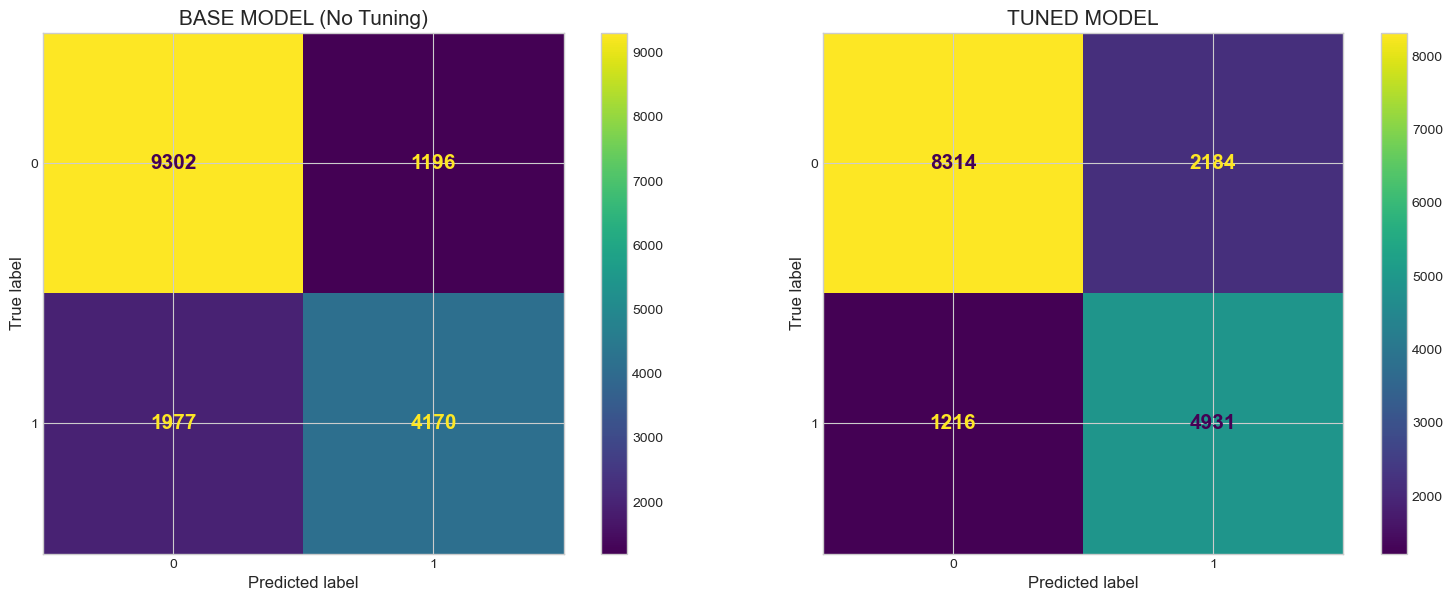

In [ ]:
# Visualize confusion matrices
figure, axes = plt.subplots(ncols=2, figsize=(16, 6))

text_format = {'size': 15, 'weight': 'bold'}

ConfusionMatrixDisplay(conf_matrix_base).plot(ax=axes[0], text_kw=text_format)
axes[0].set_title("BASE MODEL (No Tuning)", fontsize=15)

ConfusionMatrixDisplay(conf_matrix_tuned).plot(ax=axes[1], text_kw=text_format)
axes[1].set_title("TUNED MODEL", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# --- DEFINISI BIAYA REALISTIS ---
FP_COST_REAL = 50000   # Biaya False Positive (Rp50.000)
FN_COST_REAL = 450000  # Biaya False Negative (Rp450.000)

print("=" * 70)
print("1. FINANCIAL IMPACT: BASE MODEL (Random Forest Default)")
print("=" * 70)
# Menggunakan fungsi baru dan hanya dua parameter biaya
print(summarize_financial_impact(conf_matrix_base, 
                                 fp_cost=FP_COST_REAL, 
                                 fn_cost=FN_COST_REAL))

print("\n" + "=" * 70)
print("2. FINANCIAL IMPACT: TUNED MODEL (SMOTE/Class Weight - FINAL)")
print("=" * 70)
# Menggunakan fungsi baru dan biaya realistis
print(summarize_financial_impact(conf_matrix_tuned, 
                                 fp_cost=FP_COST_REAL, 
                                 fn_cost=FN_COST_REAL))

1. FINANCIAL IMPACT: BASE MODEL (Random Forest Default)


    --- Financial Impact Summary (Hotel) ---

        Total Samples (Test): 16,645

        FN (Kamar Kosong): 1,977
        FP (Salah Duga No-Show): 1,196
        TP (Benar Prediksi No-Show): 4,170

        -------------------------------------------

        Kerugian FN (Rp450,000/kamar): Rp889,650,000
        Kerugian FP (Rp50,000/kasus): Rp59,800,000

        Total Kerugian DENGAN Model: Rp949,450,000

        Total Kerugian TANPA Model (Baseline): Rp2,766,150,000


        Total Penghematan Finansial: Rp1,816,700,000

    -------------------------------------------
    

2. FINANCIAL IMPACT: TUNED MODEL (SMOTE/Class Weight - FINAL)


    --- Financial Impact Summary (Hotel) ---

        Total Samples (Test): 16,645

        FN (Kamar Kosong): 1,216
        FP (Salah Duga No-Show): 2,184
        TP (Benar Prediksi No-Show): 4,931

        -------------------------------------------

        Kerugian FN (Rp450,000/kamar): Rp5

In [ ]:
print("=" * 60)
print("FINANCIAL IMPACT: 0. BASELINE / TANPA MODEL (Prediksi: Semua Akan Datang)")
print("=" * 60)

# Prediksi: Semua 0 (Semua Akan Datang/Show)
y_no_model = np.zeros(y_test.shape[0]) 

# Hitung Confusion Matrix
# Matriks akan berisi: [[TN, 0], [FN+TP, 0]]
conf_matrix_no_model = confusion_matrix(y_test, y_no_model)

# Menggunakan fungsi finansial yang sudah dimodifikasi
print(summarize_financial_impact(conf_matrix_no_model, 
                                 fp_cost=FP_COST_REAL, 
                                 fn_cost=FN_COST_REAL))

FINANCIAL IMPACT: 0. BASELINE / TANPA MODEL (Prediksi: Semua Akan Datang)


    --- Financial Impact Summary (Hotel) ---

        Total Samples (Test): 16,645

        FN (Kamar Kosong): 6,147
        FP (Salah Duga No-Show): 0
        TP (Benar Prediksi No-Show): 0

        -------------------------------------------

        Kerugian FN (Rp450,000/kamar): Rp2,766,150,000
        Kerugian FP (Rp50,000/kasus): Rp0

        Total Kerugian DENGAN Model: Rp2,766,150,000

        Total Kerugian TANPA Model (Baseline): Rp2,766,150,000


        Total Penghematan Finansial: Rp0

    -------------------------------------------
    


In [33]:
pipe_tuned = joblib.load("final_model_RandomForest_Capstone3_20251113_1125.pkl")

pipe_tuned

,steps,"[('preprocessing', ...), ('sampler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
# ##import datatime for systematic line naming 
# from datetime import datetime #biar ada timestamp di filename
# import pickle

# # Generate timestamp for versioning

# timestamp = datetime.now().strftime('%Y%m%d_%H%M')
# print(f"Timestamp for this session : {timestamp}")

In [36]:
# # Save tuned model with timestamp
# model_filename = f"final_model_RandomForest_Capstone3_{timestamp}.pkl"
# with open(model_filename, "wb") as f:
#     pickle.dump(pipe_tuned, f)
# print(f"Model saved as: {model_filename}")

In [37]:
pipe_tuned.steps

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(drop='first',
                                                 handle_unknown='ignore',
                                                 sparse_output=False),
                                   ['market_segment', 'deposit_type',
                                    'customer_type']),
                                  ('binary', BinaryEncoder(),
                                   ['country', 'reserved_room_type'])])),
 ('sampler', SMOTE(k_neighbors=6, random_state=0)),
 ('modeling', RandomForestClassifier(n_estimators=182, random_state=0))]

In [38]:
rf_tuned_model = pipe_tuned["modeling"]
rf_tuned_model

,n_estimators,182
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
preprocess_tuned = pipe_tuned["preprocessing"]
preprocess_tuned

,transformers,"[('onehot', ...), ('binary', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [ ]:

# PREPARE DATA FOR SHAP

print("="*60)
print("STEP 1: PREPARING DATA")
print("="*60)

# Transform training data menggunakan preprocessing pipeline
X_train_transform = preprocess_tuned.transform(X_train)
X_test_transform = preprocess_tuned.transform(X_test)

# Get feature names
feature_names = X_train_transform.columns.tolist()

print(f"✓ Training data transformed: {X_train_transform.shape}")
print(f"✓ Test data transformed: {X_test_transform.shape}")
print(f"✓ Number of features: {len(feature_names)}")



STEP 1: PREPARING DATA
✓ Training data transformed: (66577, 29)
✓ Test data transformed: (16645, 29)
✓ Number of features: 29


In [41]:

# 2. APPLY SMOTE (Optional - sesuai model Anda)

print("\n" + "="*60)
print("STEP 2: APPLYING SMOTE")
print("="*60)

from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=6, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transform, y_train)

# Convert back to DataFrame (PENTING!)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=feature_names)

print(f"✓ After SMOTE: {X_train_resampled.shape}")
print(f"  - Original positive class: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"  - After SMOTE positive class: {y_train_resampled.sum()} ({y_train_resampled.sum()/len(y_train_resampled)*100:.1f}%)")




STEP 2: APPLYING SMOTE


✓ After SMOTE: (83984, 29)
  - Original positive class: 24585 (36.9%)
  - After SMOTE positive class: 41992 (50.0%)


In [42]:

# 3. TRAIN MODEL

print("\n" + "="*60)
print("STEP 3: TRAINING MODEL ON RESAMPLED DATA")
print("="*60)

from sklearn.ensemble import RandomForestClassifier

# Train fresh model (atau gunakan yang sudah ada)
rf_for_shap = RandomForestClassifier(n_estimators=182, random_state=0)
rf_for_shap.fit(X_train_resampled, y_train_resampled)

print("✓ Model trained successfully")




STEP 3: TRAINING MODEL ON RESAMPLED DATA
✓ Model trained successfully


In [43]:

# SAMPLE DATA FOR SHAP (untuk efisiensi)


print("\n" + "="*60)
print("STEP 4: SAMPLING DATA FOR SHAP ANALYSIS")
print("="*60)

# Background data (untuk TreeExplainer)
np.random.seed(0)
background_size = min(500, X_train_resampled.shape[0])
background_indices = np.random.choice(X_train_resampled.shape[0], 
                                      size=background_size, 
                                      replace=False)
X_background = X_train_resampled.iloc[background_indices]

print(f"✓ Background sample: {X_background.shape[0]} rows")

# Test data untuk explain
test_sample_size = min(300, X_test_transform.shape[0])
test_indices = np.random.choice(X_test_transform.shape[0], 
                                size=test_sample_size, 
                                replace=False)
X_test_sample = X_test_transform.iloc[test_indices]

print(f"✓ Test sample for explanation: {X_test_sample.shape[0]} rows")




STEP 4: SAMPLING DATA FOR SHAP ANALYSIS
✓ Background sample: 500 rows
✓ Test sample for explanation: 300 rows


In [44]:

# CREATE SHAP EXPLAINER & CALCULATE VALUES
print("\n" + "="*60)
print("STEP 5: CALCULATING SHAP VALUES")
print("="*60)

# Create explainer
explainer = shap.TreeExplainer(rf_for_shap, data=X_background)
print("✓ SHAP TreeExplainer created")

# Calculate SHAP values
shap_values_raw = explainer.shap_values(X_test_sample)

print(f"✓ Raw SHAP values type: {type(shap_values_raw)}")
if isinstance(shap_values_raw, list):
    print(f"  - List with {len(shap_values_raw)} elements")
    print(f"  - Class 0 shape: {shap_values_raw[0].shape}")
    print(f"  - Class 1 shape: {shap_values_raw[1].shape}")
elif isinstance(shap_values_raw, np.ndarray):
    print(f"  - Array shape: {shap_values_raw.shape}")

# Untuk binary classification, ambil class 1 (Canceled = 1)
if isinstance(shap_values_raw, list) and len(shap_values_raw) == 2:
    # Binary classification - ambil class 1
    shap_values = shap_values_raw[1]
    print(f"✓ Using class 1 (Canceled) SHAP values")
elif isinstance(shap_values_raw, np.ndarray) and shap_values_raw.ndim == 3:
    # Format (n_samples, n_features, n_classes)
    shap_values = shap_values_raw[:, :, 1]
    print(f"✓ Extracted class 1 from 3D array")
else:
    shap_values = shap_values_raw
    print(f"✓ Using SHAP values as-is")
    
print(f"✓ Final SHAP values shape: {shap_values.shape}")
print(f"  Expected: ({X_test_sample.shape[0]} samples, {X_test_sample.shape[1]} features)")



STEP 5: CALCULATING SHAP VALUES
✓ SHAP TreeExplainer created


100%|===================| 598/600 [02:33<00:00]        

✓ Raw SHAP values type: <class 'numpy.ndarray'>
  - Array shape: (300, 29, 2)
✓ Extracted class 1 from 3D array
✓ Final SHAP values shape: (300, 29)
  Expected: (300 samples, 29 features)



GENERATING SHAP VISUALIZATIONS

1. Generating Summary Plot (Beeswarm)...


/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1992032891.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


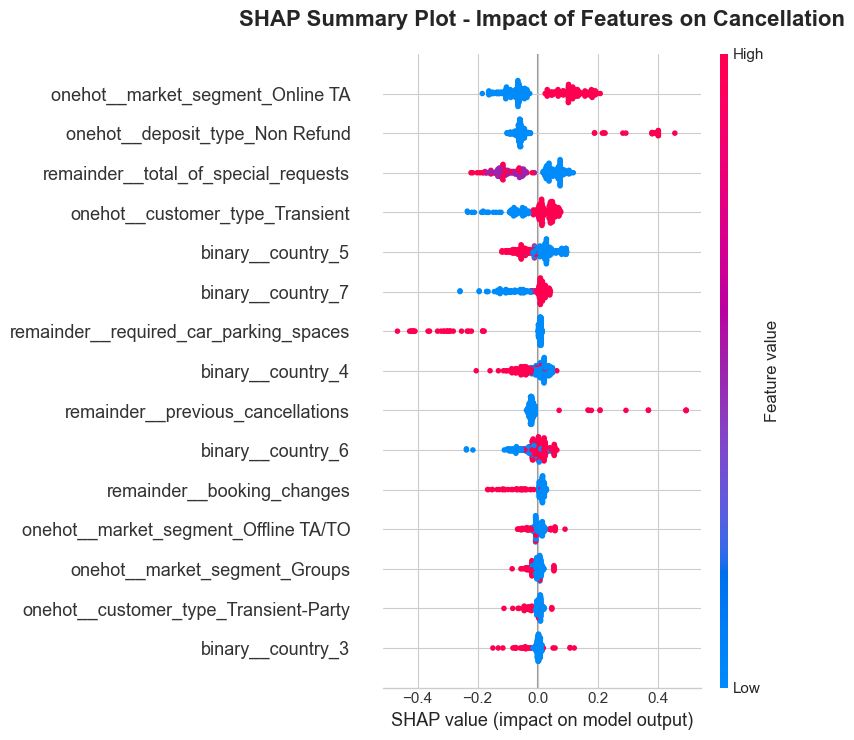

✓ Summary plot completed


In [45]:
# VISUALIZATIONS
print("\n" + "="*60)
print("GENERATING SHAP VISUALIZATIONS")
print("="*60)

# Convert to numpy array untuk kompatibilitas SHAP
X_test_sample_array = X_test_sample.values

print("\n1. Generating Summary Plot (Beeswarm)...")
plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_values,
    X_test_sample_array,
    feature_names=feature_names,
    show=False,
    max_display=15
)
plt.title("SHAP Summary Plot - Impact of Features on Cancellation", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("✓ Summary plot completed")



2. Generating Feature Importance Bar Plot...


/var/folders/dc/s4_2lkhj1w71d400jbv_shvm0000gn/T/ipykernel_76955/1368807459.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


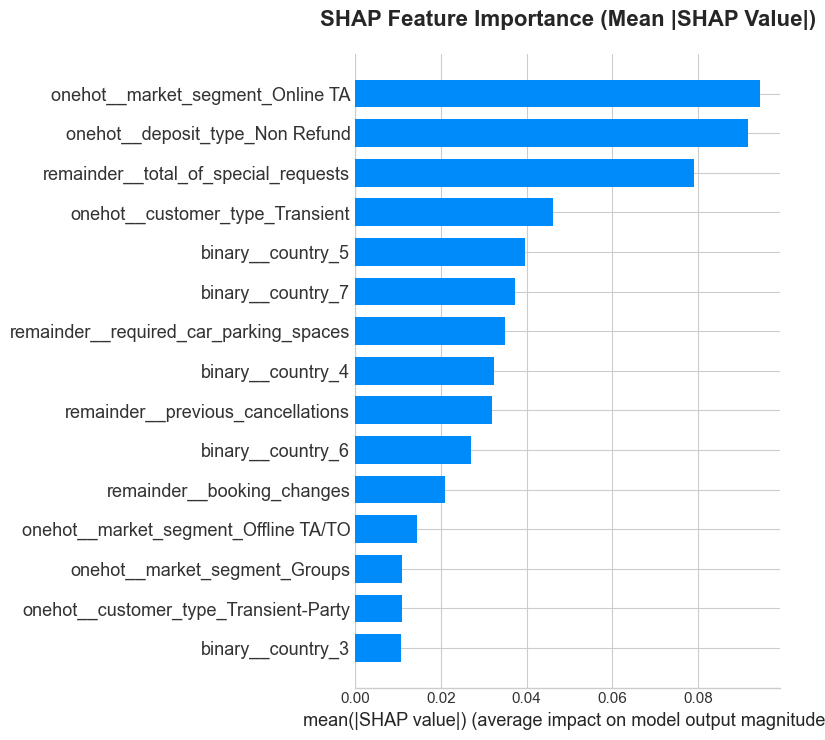

✓ Bar plot completed


In [46]:
# ====== FEATURE IMPORTANCE BAR PLOT ======
print("\n2. Generating Feature Importance Bar Plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_test_sample_array,
    feature_names=feature_names,
    plot_type="bar",
    show=False,
    max_display=15
)
plt.title("SHAP Feature Importance (Mean |SHAP Value|)", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("✓ Bar plot completed")



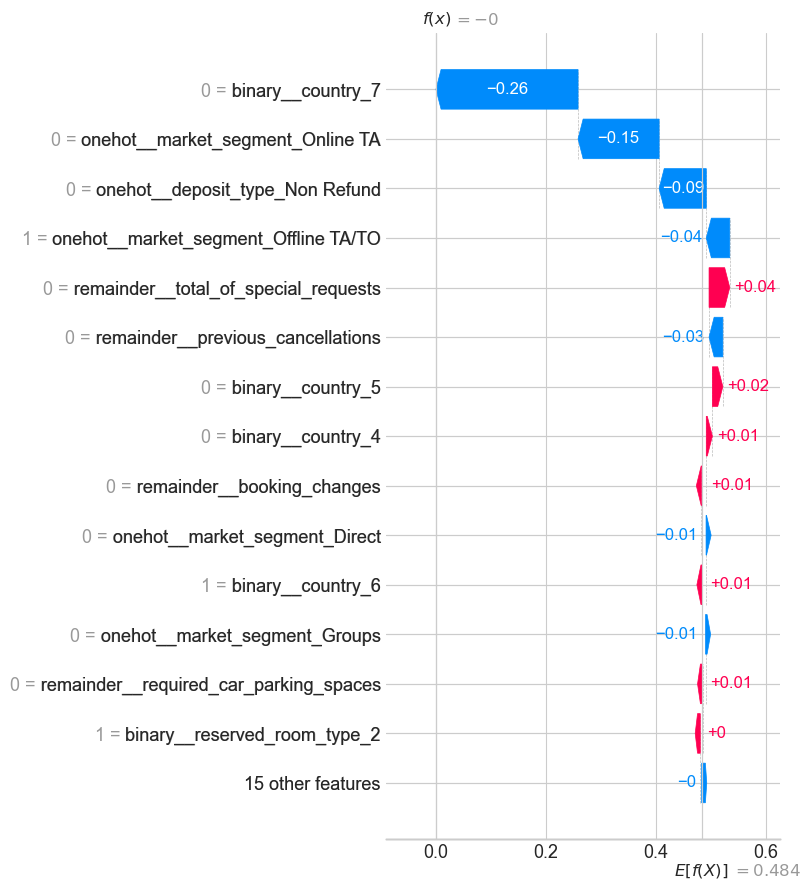

Waterfall plot completed


In [ ]:
# ====== WATERFALL PLOT (Single Prediction) ======

# Ambil expected value
if isinstance(explainer.expected_value, (list, np.ndarray)):
    expected_value = explainer.expected_value[1]
else:
    expected_value = explainer.expected_value

single_shap_values = shap_values[0]
if single_shap_values.ndim > 1:
    single_shap_values = single_shap_values.flatten()

# Create explanation object
explanation = shap.Explanation(
    values=single_shap_values,
    base_values=expected_value,
    data=X_test_sample_array[0],
    feature_names=feature_names
)

# Plot waterfall
shap.plots.waterfall(explanation, max_display=15, show=False)
plt.tight_layout()
plt.show()
print("Waterfall plot completed")



  Top 3 features: ['onehot__market_segment_Online TA', 'onehot__deposit_type_Non Refund', 'remainder__total_of_special_requests']


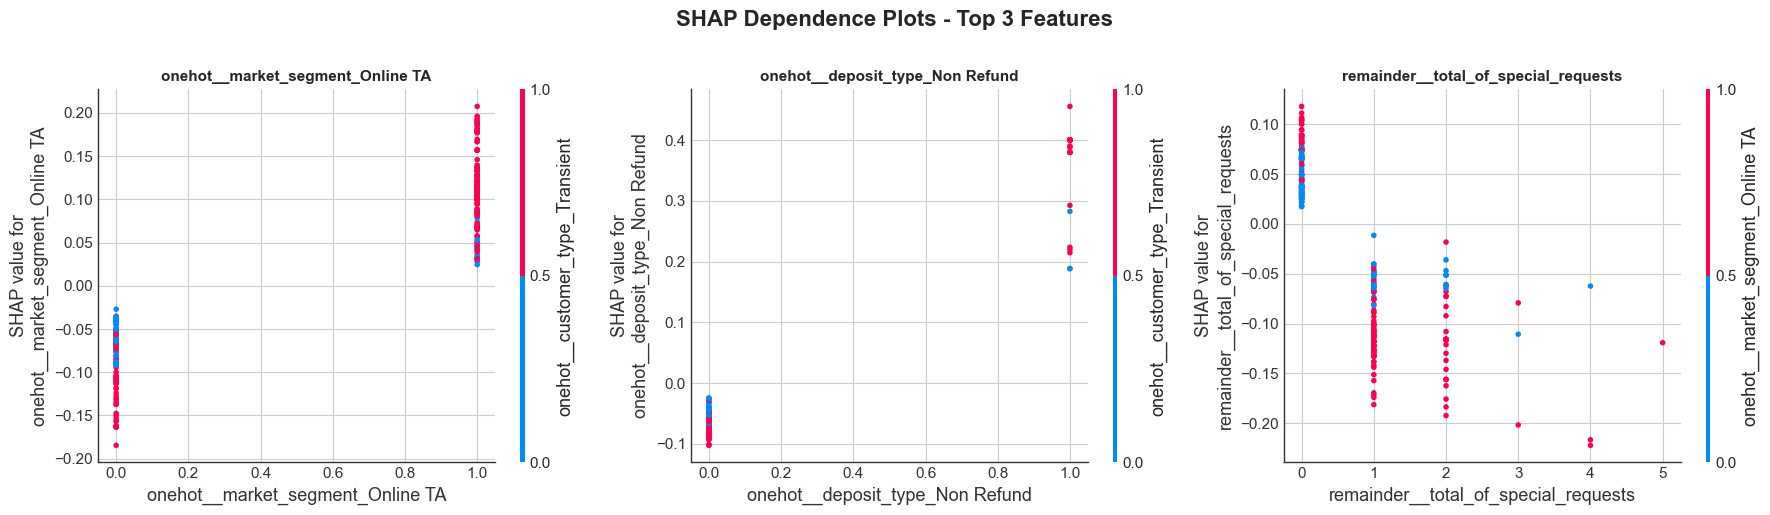

Dependence plots completed


In [48]:
# ====== DEPENDENCE PLOTS (Top 3 Features) ======


# Hitung mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features_idx = np.argsort(mean_abs_shap)[-3:][::-1]
top_features = [feature_names[i] for i in top_features_idx]

print(f"  Top 3 features: {top_features}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature_name in enumerate(top_features):
    plt.sca(axes[idx])
    
    # Gunakan feature name langsung (bukan index)
    shap.dependence_plot(
        feature_name,
        shap_values,
        X_test_sample_array,
        feature_names=feature_names,
        show=False,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{feature_name}", fontsize=11, fontweight='bold')

plt.suptitle("SHAP Dependence Plots - Top 3 Features", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("Dependence plots completed")



In [49]:

# FEATURE IMPORTANCE TABLE

print("\n" + "="*60)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*60)

# Create feature importance dataframe
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP|': mean_abs_shap
}).sort_values('Mean |SHAP|', ascending=False).reset_index(drop=True)

# Display top 15
print(feature_importance_df.head(15).to_string(index=True))




TOP 15 MOST IMPORTANT FEATURES
                                   Feature  Mean |SHAP|
0         onehot__market_segment_Online TA     0.094465
1          onehot__deposit_type_Non Refund     0.091688
2     remainder__total_of_special_requests     0.079159
3          onehot__customer_type_Transient     0.046235
4                        binary__country_5     0.039643
5                        binary__country_7     0.037243
6   remainder__required_car_parking_spaces     0.034869
7                        binary__country_4     0.032317
8        remainder__previous_cancellations     0.032051
9                        binary__country_6     0.027067
10              remainder__booking_changes     0.021062
11    onehot__market_segment_Offline TA/TO     0.014436
12           onehot__market_segment_Groups     0.010867
13   onehot__customer_type_Transient-Party     0.010849
14                       binary__country_3     0.010732




## Penjelasan SHAP *Feature Importance*


* **Nilai Mean |SHAP|:** Mengukur rata-rata magnitudo (nilai absolut) dari kontribusi SHAP setiap fitur terhadap prediksi model di seluruh dataset. **Semakin tinggi nilainya, semakin besar pengaruh fitur tersebut terhadap output prediksi.**
* **Format Nama Fitur:**
    * `onehot__...`: Fitur kategorikal yang sudah di-**One Hot Encoding**.
    * `binary__...`: Fitur kategorikal yang sudah di-**Binary Encoding**.
    * `remainder__...`: Fitur yang tersisa setelah transformasi, kemungkinan besar fitur numerik.

### 1. Interpretasi Fitur Paling Dominan (Top 5)

| Peringkat | Fitur | Tipe Fitur | Mean |SHAP| | Interpretasi Bisnis (Dampak Pembatalan) |
| :---: | :--- | :--- | :---: | :--- |
| **1** | **`onehot__market_segment_Online TA`** | Kategorikal | **0.094** | **Segmen Pasar adalah faktor penentu terpenting.** Pemesanan yang datang dari *Online Travel Agent* (OTA) memiliki pengaruh terbesar dalam memprediksi pembatalan. Biasanya, pemesanan dari OTA lebih mudah dibatalkan (karena kebijakan fleksibel). |
| **2** | **`onehot__deposit_type_Non Refund`** | Kategorikal | **0.092** | Kontribusi ini **sangat logis**. Jika jenis deposit adalah **Non-Refundable** (tidak bisa dikembalikan), probabilitas pembatalan (target = 1) akan **sangat rendah**, dan sebaliknya. Ini adalah fitur penentu yang kuat. |
| **3** | **`remainder__total_of_special_requests`** | Numerik | **0.079** | Jumlah permintaan khusus (misalnya, kamar *non-smoking*, kasur tambahan). **Semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan** (karena tamu yang memiliki permintaan spesifik biasanya lebih berkomitmen terhadap reservasi). |
| **4** | **`onehot__customer_type_Transient`** | Kategorikal | **0.046** | Tipe pelanggan **Transient** (sekali pakai/individual) memiliki pengaruh besar. Biasanya, tamu *transient* memiliki tingkat pembatalan lebih tinggi daripada tamu Grup atau Kontrak. |
| **5** | **`binary__country_5`** | Kategorikal | **0.040** | Salah satu *encoding* biner untuk fitur **`country`**. Menunjukkan bahwa satu atau sekelompok negara tertentu memiliki pengaruh signifikan terhadap prediksi model, mengindikasikan bahwa **lokasi geografis adalah prediktor kunci**. |

---

### 2. Implikasi Bisnis Berdasarkan SHAP

Daftar SHAP ini memberikan panduan yang jelas bagi Revenue Manager:

| Masalah Bisnis | Fitur yang Dikuasai | Aksi Rekomendasi |
| :--- | :--- | :--- |
| **Risiko Pembatalan Tinggi** | `onehot__market_segment_Online TA` | Menerapkan **kebijakan pembatalan yang lebih ketat** hanya untuk segmen OTA, atau menawarkan diskon khusus untuk pilihan *non-refundable* pada segmen ini. |
| **Komitmen Pelanggan** | `onehot__deposit_type_Non Refund` | Mendorong pelanggan untuk memilih opsi **Non-Refundable** karena ini adalah cara yang paling efektif untuk mengunci komitmen mereka (seperti yang ditunjukkan oleh nilai SHAP yang tinggi). |
| **Sinyal Komitmen Awal** | `remainder__total_of_special_requests` | Memanfaatkan data ini dalam model. Jika reservasi memiliki banyak permintaan khusus, sistem dapat **mengurangi skor risiko pembatalannya**, yang berarti lebih aman untuk melakukan *overbook* pada kamar tersebut. |
| **Risiko Geografis** | `binary__country_X` | Melakukan analisis lebih lanjut untuk mengidentifikasi negara mana yang diwakili oleh *encoding* ini. Kemudian, Revenue Manager dapat **membuat penyesuaian harga atau deposit** berdasarkan risiko negara tersebut. |

**Kesimpulan:** Berdasarkan SHAP, **keputusan pemesanan** (seperti jenis deposit dan segmen pasar) memiliki bobot pengaruh yang lebih besar terhadap pembatalan daripada karakteristik reservasi numerik (*seperti yang mungkin didominasi oleh Gini Importance*).

In [50]:
# ==========================================
# BUSINESS INSIGHTS
# ==========================================

print("\n" + "="*60)
print("BUSINESS INSIGHTS")
print("="*60)

# Clean feature names untuk interpretasi
def clean_feature_name(name):
    """Convert technical feature names to business-friendly names"""
    mapping = {
        'onehot__deposit_type_Non Refund': 'Non-Refundable Deposit',
        'onehot__deposit_type_Refundable': 'Refundable Deposit',
        'remainder__previous_cancellations': 'Previous Cancellations Count',
        'remainder__booking_changes': 'Number of Booking Changes',
        'remainder__days_in_waiting_list': 'Days in Waiting List',
        'onehot__customer_type_Transient': 'Transient Customer Type',
        'onehot__customer_type_Group': 'Group Booking',
        'onehot__market_segment_Online TA': 'Online Travel Agency',
        'onehot__market_segment_Offline TA/TO': 'Offline Travel Agency',
        'remainder__required_car_parking_spaces': 'Parking Space Required',
        'remainder__total_of_special_requests': 'Special Requests Count'
    }
    
    for key, value in mapping.items():
        if key in name:
            return value
    
    # Fallback: clean the name
    name = name.replace('onehot__', '').replace('remainder__', '').replace('binary__', '')
    return name.replace('_', ' ').title()

print("\nKey Drivers of Booking Cancellations:\n")
for idx, row in feature_importance_df.head(10).iterrows():
    clean_name = clean_feature_name(row['Feature'])
    importance = row['Mean |SHAP|']
    print(f"{idx+1:2d}. {clean_name:<40s} → Impact: {importance:.4f}")

print("\n" + "="*60)
print("SHAP ANALYSIS COMPLETE!")
print("="*60)


BUSINESS INSIGHTS

Key Drivers of Booking Cancellations:

 1. Online Travel Agency                     → Impact: 0.0945
 2. Non-Refundable Deposit                   → Impact: 0.0917
 3. Special Requests Count                   → Impact: 0.0792
 4. Transient Customer Type                  → Impact: 0.0462
 5. Country 5                                → Impact: 0.0396
 6. Country 7                                → Impact: 0.0372
 7. Parking Space Required                   → Impact: 0.0349
 8. Country 4                                → Impact: 0.0323
 9. Previous Cancellations Count             → Impact: 0.0321
10. Country 6                                → Impact: 0.0271

SHAP ANALYSIS COMPLETE!




##  BUSINESS INSIGHTS: Analisis SHAP (Faktor Pendorong Pembatalan)


### Top 3 *Strategic Levers* (Pengungkit Strategis Utama)

Tiga fitur teratas ini adalah area di mana **manajemen memiliki kendali paling besar** untuk memitigasi risiko pembatalan dan memaksimalkan komitmen pelanggan.

| Rank | Fitur | Impact (Pengaruh) | Interpretasi Bisnis & Rekomendasi |
| :---: | :--- | :---: | :--- |
| **1** | **Online Travel Agency** | **0.0945** | **Risiko Pemasaran Tertinggi.** Pemesanan melalui OTA (seperti Booking.com, Agoda) adalah faktor utama pendorong pembatalan. Ini terjadi karena kebijakan OTA sering kali lebih fleksibel (mudah batal tanpa biaya) atau pembeli membandingkan harga. <br> **Aksi:** Tawarkan harga yang **lebih murah/eksklusif** untuk pemesanan *Direct* (langsung) dan kurangi *allotment* kamar pada OTA saat periode *peak season* untuk memaksa tamu beralih ke saluran *direct* yang lebih berkomitmen. |
| **2** | **Non-Refundable Deposit** | **0.0917** | **Sinyal Komitmen Paling Jelas.** Fitur ini memiliki pengaruh sangat kuat, tetapi sifatnya terbalik: *Jika deposit adalah **Non-Refundable**, probabilitas pembatalan akan **sangat rendah**.* Ini menunjukkan bahwa *incentive* finansial adalah penguat komitmen terbaik. <br> **Aksi:** Perkuat upaya pemasaran untuk **Opsi Non-Refundable**, bahkan dengan sedikit diskon, terutama untuk pemesanan yang diprediksi berisiko tinggi. |
| **3** | **Special Requests Count** | **0.0792** | **Indikator Komitmen Personal.** Semakin banyak permintaan khusus (tempat tidur bayi, kamar lantai tinggi, dll.), semakin tinggi komitmen tamu terhadap reservasi tersebut (karena mereka telah menginvestasikan waktu dalam penyesuaian). <br> **Aksi:** Gunakan fitur ini sebagai **skor keamanan**. Reservasi dengan permintaan khusus tinggi memiliki skor risiko pembatalan rendah, memungkinkan *Revenue Manager* melakukan *overbook* dengan lebih aman pada reservasi ini. |

-----

### Risiko dan Preferensi Pelanggan (Rank 4-7)

| Rank | Fitur | Impact (Pengaruh) | Interpretasi Bisnis & Rekomendasi |
| :---: | :--- | :---: | :--- |
| **4** | **Transient Customer Type** | **0.0462** | **Risiko Pelanggan Individual Tinggi.** Pelanggan *Transient* (perorangan, tidak terikat grup/kontrak) menyumbang risiko pembatalan yang lebih besar karena rencana perjalanan mereka lebih fleksibel. <br> **Aksi:** Targetkan pelanggan *Transient* dengan paket yang mengandung elemen **Non-Refundable Deposit** (Rank 2) untuk mengunci komitmen mereka. |
| **5, 6, 8, 10** | **Country 5, 7, 4, 6** | **0.0396 - 0.0271** | **Risiko Geografis.** Beberapa negara (yang diwakili oleh *Country 5, 7, 4, 6* dalam model Anda) memiliki tingkat pembatalan yang secara statistik lebih tinggi. <br> **Aksi:** Lakukan analisis demografi untuk mengidentifikasi negara-negara ini. Terapkan **persyaratan pembayaran di muka** yang lebih ketat atau **waktu pembatalan yang lebih awal** khusus untuk pemesanan dari negara-negara berisiko tinggi ini. |
| **7** | **Parking Space Required** | **0.0349** | **Kebutuhan Fisik vs. Pembatalan.** Tamu yang *membutuhkan* tempat parkir (yang menyiratkan mereka tiba dengan kendaraan pribadi dan mungkin menginap lebih lama) cenderung **lebih kecil** kemungkinannya untuk membatalkan. <br> **Aksi:** Sama seperti *Special Requests*, ini adalah **sinyal komitmen fisik** yang dapat digunakan untuk menurunkan skor risiko pembatalan. |

-----

### Faktor Sejarah dan Perubahan (Rank 9-10)

| Rank | Fitur | Impact (Pengaruh) | Interpretasi Bisnis & Rekomendasi |
| :---: | :---: | :---: | :--- |
| **9** | **Previous Cancellations Count** | **0.0321** | **Perilaku Masa Lalu.** Tamu yang memiliki riwayat pembatalan di masa lalu cenderung memiliki kemungkinan pembatalan yang lebih tinggi. <br> **Aksi:** Otomatisasi sistem untuk memberikan **peringatan risiko tinggi** (atau bahkan menolak reservasi tanpa *full pre-payment*) bagi pelanggan dengan riwayat pembatalan yang buruk. |
| **11 (Tambahan)** | **Booking Changes** | **0.0211** | **Indikator Fleksibilitas.** Jumlah perubahan yang dilakukan pada reservasi. Walaupun nilainya tidak terlalu tinggi, perubahan yang sering bisa menunjukkan keraguan (risiko pembatalan tinggi) atau justru peningkatan komitmen (jika perubahan dilakukan untuk mengamankan tanggal). Model menganggap ini sebagai faktor yang memengaruhi prediksi. |

In [51]:
## save lime explainer untuk deployment 
with open('tree_explainer.dill','wb') as file:
    dill.dump(explainer,file)

print("TREE EXPLAINER SAVED SUCCESSFULLY")

TREE EXPLAINER SAVED SUCCESSFULLY


In [52]:
pd.set_option('display.max_colwidth', None)


cat_cols = X.select_dtypes(exclude='number').columns

unique_values_df = pd.DataFrame({
    'column': cat_cols,
    'unique_values': [X[col].unique().tolist() for col in cat_cols]
})

unique_values_df.to_csv("kolom_kategori_unique_values.csv", index=False)
unique_values_df

,column,unique_values
0,country,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, SVK, ...]"
1,market_segment,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,deposit_type,"[No Deposit, Non Refund, Refundable]"
3,customer_type,"[Transient-Party, Transient, Contract, Group]"
4,reserved_room_type,"[A, E, D, F, B, G, C, H, L, P]"


In [53]:
X.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,83222.000000,83222.000000,83222.000000,83222.000000,83222.000000
mean,0.086864,0.220927,2.340391,0.062351,0.573610
std,0.842588,0.648975,17.709632,0.245786,0.795082
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000


In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib
import sklearn
import category_encoders
import imblearn
import xgboost
import shap
import joblib

print("## Versi Library Utama (Data Science & ML) ##")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")
print(f"Imbalanced-learn Version: {imblearn.__version__}")
print(f"XGBoost Version: {xgboost.__version__}")
print(f"SHAP Version: {shap.__version__}")
print(f"Category Encoders Version: {category_encoders.__version__}")
print(f"Joblib Version (Model Persistence): {joblib.__version__}")

## Versi Library Utama (Data Science & ML) ##
NumPy Version: 2.3.1
Pandas Version: 2.3.1
Seaborn Version: 0.13.2
Matplotlib Version: 3.10.0
Scikit-learn Version: 1.7.1
Imbalanced-learn Version: 0.14.0
XGBoost Version: 2.1.1
SHAP Version: 0.49.1
Category Encoders Version: 2.8.1
Joblib Version (Model Persistence): 1.5.1


In [55]:
to_requirement = """
scikit_learn==1.7.1
xgboost==2.1.1
imbalanced-learn==0.14.0
numpy==2.3.1
pandas==2.3.1
streamlit==1.50.0
joblib==1.5.1
dill==0.4.0
matplotlib==3.10.0
seaborn==0.13.2
category-encoders==2.8.1
shap==0.49.1
"""

In [56]:
with open ("requirements.txt","w") as file:
    file.write(to_requirement) #gak pake binary karena mau save bentuk text

print ("Saving requirement.txt successfully")

Saving requirement.txt successfully
